# Tugas Besar - IF2220 - Probabilitas dan Statistika
**Penarikan kesimpulan dan pengujian hipotesis**

Enam Langkah Testing:
1. Tentukan Hipotesis nol $(H_0: θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$, $θ < θ_0$, atau $θ ≠ θ_0$
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung $p$-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.

# Soal
Diberikan sebuah data Gandum.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar IF2220. 

Gandum.csv merupakan data klasifikasi biji gandum yang mengandung 12 kolom sebagai berikut:
1. ID
2. Daerah
3. SumbuUtama
4. SumbuKecil
5. Keunikan
6. AreaBulatan
7. Diameter
8. KadarAir
9. Keliling
10. Bulatan
11. Ransum
12. Kelas

Kolom 2-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target.

Anda diminta untuk melakukan analisis statistika sebagai berikut:
### 1. Menulis deskripsi statistika (Descriptive Statistics)
Tuliskan descriptive statistics dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [1]:
# Load dataset
# import import_ipynb
from IPython.display import Markdown, display
from pandas import *
from matplotlib import *
import seaborn as sns
dataset = read_csv("dataset/Gandum.csv")

def printMarkdown(rawString):
    display(Markdown(rawString))

# Print mean, std, min, max, quartile
printMarkdown("#### Mean, Standar deviasi, Minimum, Maximum, dan Kuartil")
dataset.describe()

#### Mean, Standar deviasi, Minimum, Maximum, dan Kuartil

,ID,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
std,144.481833,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
min,1.000000,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
25%,125.750000,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,250.500000,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
75%,375.250000,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612,2.000000
max,500.000000,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000


In [2]:
# Range, Variance, Median, Modus, IQR, Skewness, & Kurtosis 
printMarkdown("#### Range, Varians, Median, Modus, IQR, Skewness, dan Kurtosis")
describe_pandas = dataset.describe()

# Inisiasi dictionary
dictionary_gandum = {}
dictionary_gandum["Kolom"] = []
dictionary_gandum["Range"] = []
dictionary_gandum["Varians"] = []
dictionary_gandum["Median"] = []
dictionary_gandum["Modus"] = []
dictionary_gandum["IQR"] = []
dictionary_gandum["Skewness"] = []
dictionary_gandum["Kurtosis"] = []

# Menambahkan informasi ke dictionary
for column in describe_pandas:
    dictionary_gandum["Kolom"].append(column)
    # Range, Variance, Median, & Modus
    dictionary_gandum["Range"].append(describe_pandas[column]["max"] - describe_pandas[column]["min"])
    # | Range merupakan rentang nilai data
    dictionary_gandum["Varians"].append(dataset.var()[column])
    # | Varians adalah nilai bagaimana data tersebar
    dictionary_gandum["Median"].append(dataset.median()[column])
    # | Median adalah nilai tengah dari data, atau
    #    dapat diinterpretasikan terdapat tepat 
    #    50% data diatas dan dibawah data tersebut
    dictionary_gandum["Modus"].append(dataset.mode("index")[column][0])
    # | Modus urutan dari banyaknya kemunculan nilai
    # Note : Ambil hasil modus teratas dengan index 0
    
    # IQR, Skewness, & Kurtosis 
    dictionary_gandum["IQR"].append(describe_pandas[column]["75%"] - describe_pandas[column]["25%"])
    # | IQR adalah Selisih antara Q3 - Q1
    dictionary_gandum["Skewness"].append(dataset.skew()[column])
    # | Skewness adalah kecenderungan arah distribusi,
    #    dengan - menunjukan arah ke kanan dan sebaliknya
    dictionary_gandum["Kurtosis"].append(dataset.kurtosis()[column])
    # | Kurtosis dapat digunakan diinterpretasikan sebagai
    #    apakah distribusi memiliki banyak outlier atau tidak
    



# Perubahan dictionary ke dataframe dan menampilkannya
dataframe_gandum = DataFrame(dictionary_gandum, index=[i for i in range(1,13)])
display(dataframe_gandum)

#### Range, Varians, Median, Modus, IQR, Skewness, dan Kurtosis

,Kolom,Range,Varians,Median,Modus,IQR,Skewness,Kurtosis
1,ID,499.000000,2.087500e+04,250.500000,1.000000,249.500000,0.000000,-1.200000
2,Daerah,4931.000000,9.729761e+05,4735.000000,3992.000000,1452.750000,0.238144,-0.434631
3,SumbuUtama,153.795469,3.342544e+02,115.405140,74.133114,24.930694,0.761529,4.330534
4,SumbuKecil,29.071182,1.657365e+01,53.731199,39.906517,5.131582,-0.010828,0.475568
5,Keunikan,0.194085,1.338528e-03,0.890045,0.719916,0.043902,-1.623472,2.917256
6,AreaBulatan,5141.000000,1.023529e+06,4857.000000,3802.000000,1484.000000,0.257560,-0.409685
7,Diameter,40.747172,6.491311e+01,77.645277,71.293564,11.903290,0.002725,-0.466455
8,KadarAir,0.468972,8.905149e-03,0.626117,0.735849,0.154001,0.493661,-0.740326
9,Keliling,291.822000,1.393932e+03,280.045500,197.015000,50.179500,0.733627,2.272685
10,Bulatan,0.730158,3.807194e-03,0.761288,0.174590,0.064370,-3.599237,29.975096


***
```





```

### 2. Membuat Visualisasi plot distribusi
Buatlah visualisasi dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

#### Daerah
Distribusi data daerah cenderung normal dan tidak ada outlier yang dapat dilihat pada boxplot.

Daerah


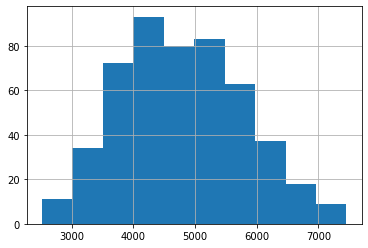

In [103]:
dataset["Daerah"].hist()

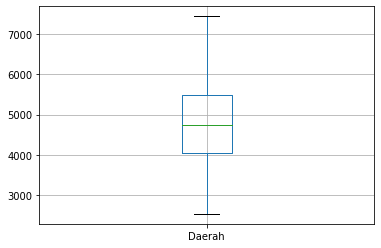

In [104]:
dataset.boxplot("Daerah")

***
```

```

#### SumbuUtama
Distribusi SumbuUtama terlihat normal meski terdapat satu outlier pada 220.

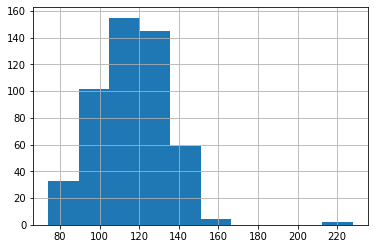

In [105]:
dataset["SumbuUtama"].hist()

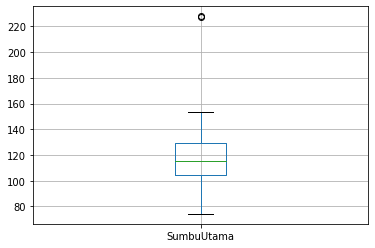

In [106]:
dataset.boxplot("SumbuUtama")

***
```

```

#### SumbuKecil
Pada histogram distribusi SumbuKecil terlihat normal, namun pada boxplot terlihat terdapat satu outlier yang terletak pada sekitar 230. Data terlihat memiliki kecenderungan standar deviasi yang kecil jika diamati dari histogram.

SumbuKecil


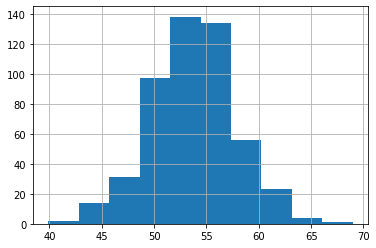

In [98]:
dataset["SumbuKecil"].hist()

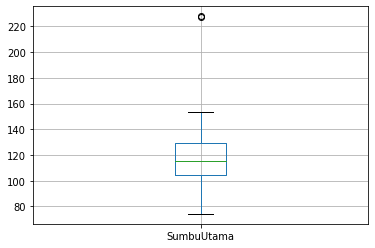

In [107]:
dataset.boxplot("SumbuUtama")

***
```

```

#### Keunikan
Distribusi Keunikan pada histogram terlihat seperti distribusi half-normal terbalik. Sebagian data juga terletak dibawah $Q_1 - 1.5IQR$ yang menyebabkan banyak data diklasifikasikan menjadi outlier pada boxplot.

Keunikan


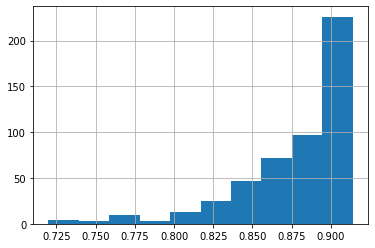

In [97]:
dataset["Keunikan"].hist()

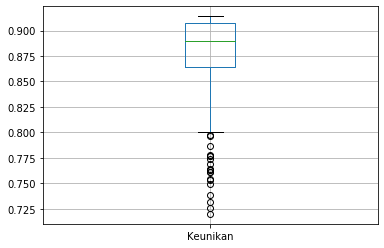

In [108]:
dataset.boxplot("Keunikan")

***
```

```

#### AreaBulatan
Distribusi AreaBulatan terlihat normal dan tidak ada outlier pada boxplot. Skewness terlihat cenderung positif dari histogram dan varians cenderung tinggi.

AreaBulatan


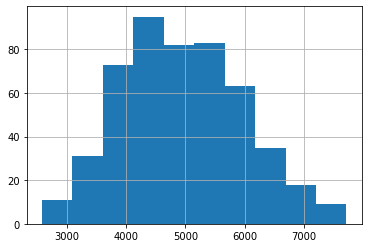

In [96]:
dataset["AreaBulatan"].hist()

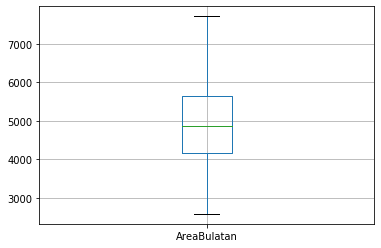

In [109]:
dataset.boxplot("AreaBulatan")

***
```

```

#### Diameter
Distribusi Diameter terlihat normal dan tidak ada outlier yang terlihat pada boxplot. Terlihat pada histogram standar deviasi data cukup besar sehingga data antara 70 dan 85 memiliki bentuk yang cenderung datar.

Diameter


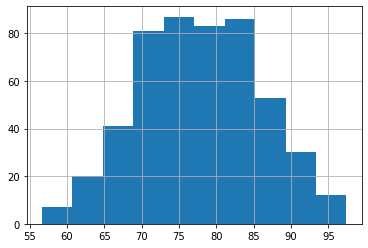

In [95]:
dataset["Diameter"].hist()

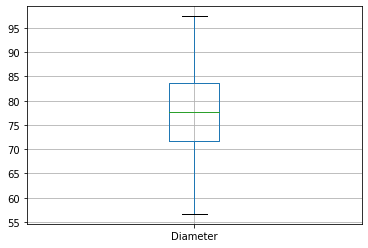

In [110]:
dataset.boxplot("Diameter")

***
```

```

#### KadarAir
Distribusi KadarAir terlihat seperti distribusi gamma dan $α$ yang cukup tinggi menyebabkan bentuk tajam keatas. Tidak ada outlier yang terlihat pada boxplot.

KadarAir


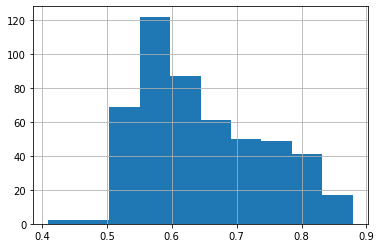

In [94]:
dataset["KadarAir"].hist()

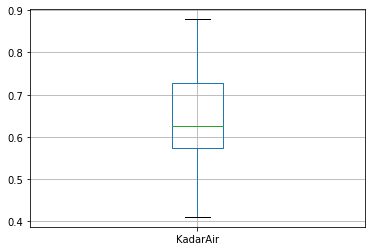

In [111]:
dataset.boxplot("KadarAir")

***
```

```

#### Keliling
Distribusi Keliling terlihat seperti distribusi normal meskipun terdapat beberapa outlier. Distribusi Keliling mungkin juga merupakan distribusi gamma jika sampel yang lebih besar menunjukan bahwa outlier-outlier tersebut masuk kedalam range $Q_3 + 1.5IQR$.

Keliling


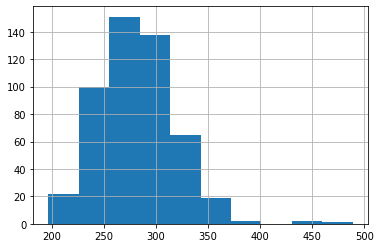

In [93]:
dataset["Keliling"].hist()

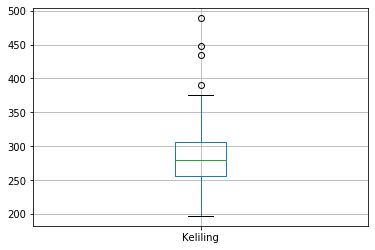

In [112]:
dataset.boxplot("Keliling")

***
```

```

#### Bulatan
Distribusi Bulatan terlihat seperti distribusi normal dengan standar deviasi yang besar. Mungkin juga distribusi bulatan merupakan distribusi gamma yang terbalik jika sampel yang diambil kurang merepresentasikan populasi.

Bulatan


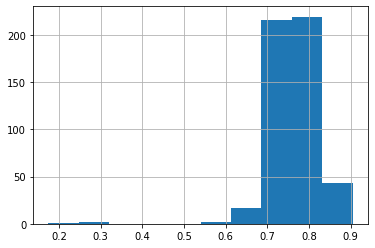

In [92]:
dataset["Bulatan"].hist()

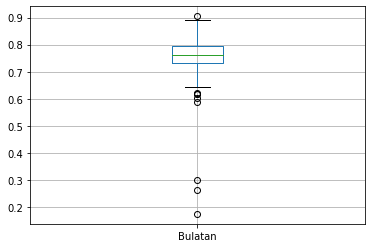

In [113]:
dataset.boxplot("Bulatan")

***
```

```

#### Ransum
Distribusi Ransum terlihat seperti distribusi half-normal terbalik. Pada boxplot tidak terlihat outlier.

Ransum


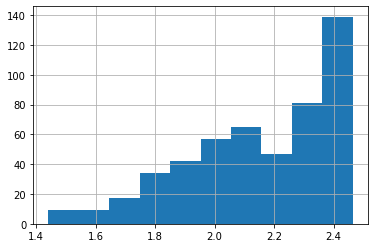

In [91]:
dataset["Ransum"].hist()

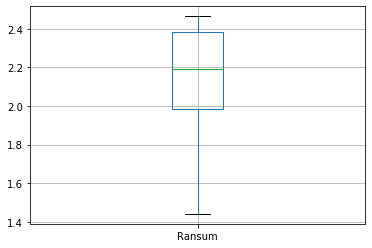

In [115]:
dataset.boxplot("Ransum")

***
```





```

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak 
Gunakan normality test yang dikaitkan dengan histogram plot.

#### Penjelasan D’Agostino’s and Pearson’s Omnibus Test Of Normality
Normality test dilakukan dengan menggabungkan variabel skewness dan kurtosis pada setiap kolom.
Apabila hasil tes menyimpulkan distribusi normal, maka pada histogram plot (yang dalam hal ini divisualisasikan
dengan `seaborn.distplot()`) akan tergambar bell-shaped curve (kurva mirip bentuk bell).

Pada tes omnibus ini, $K^2 = Z_s^2 + Z_k^2$. $Z_s$ merupakan hasil dari tes Skewness Agostino dan $Z_k$ merupakan
hasil tes Kurtosis Agostino. $K^2$ diaproksimasi terdistribusi secara $\chi^2$ (chi-squared) dengan 2 degrees of freedom.

Hipotesis null $H_0$ dalam test ini adalah diasumsikan bahwa masing-masing kolom memiliki distribusi normal.
Normality test akan menghasilkan dua output, yaitu stat dan $p$. Apabila nilai $p > 0.05$,
maka hasil test gagal untuk menolak $H_0$, sehingga kolom dapat disimpulkan memiliki distribusi normal.
Sebaliknya apabila nilai $p \leq 0.05$, maka hasil test yang dilakukan berhasil menolak $H_0$, sehingga 
kolom yang bersangkutan dapat disimpulkan tidak memiliki distribusi normal.

Hasil tes untuk setiap kolom dapat dilihat di bawah. Apabila dilihat, maka kolom yang tergolong memiliki distribusi normal
melalui Omnibus Test Of Normality hanyalah kolom SumbuKecil. Hal ini sesuai dengan visualisasi pada histogram di mana 
memang hanya kolom SumbuKecil yang menyerupai bell-shape.

In [3]:
from scipy.stats import normaltest

#### Daerah

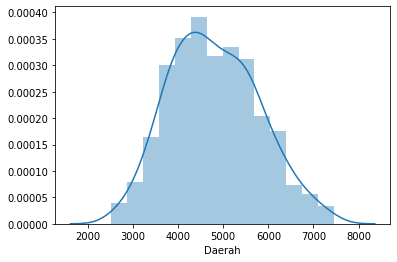

In [79]:
sns.distplot(dataset["Daerah"])

In [15]:
title = "**Daerah"
stat, p = normaltest(dataset["Daerah"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 10.859, $p$ = 0.004

**Daerah Tidak Berdistribusi Normal**

***
```

```

#### SumbuUtama

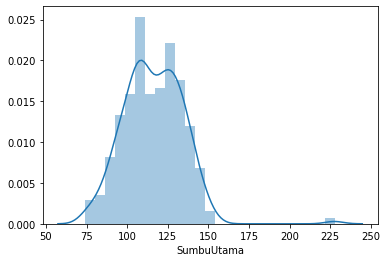

In [80]:
sns.distplot(dataset["SumbuUtama"])

In [25]:
title = "**SumbuUtama"
stat, p = normaltest(dataset["SumbuUtama"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 95.120, $p$ = 0.000

**SumbuUtama Tidak Berdistribusi Normal**

***
```

```

#### SumbuKecil

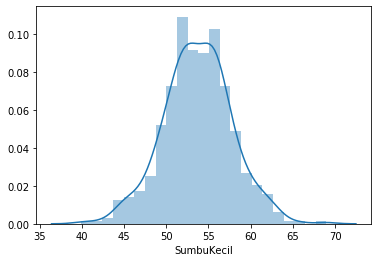

In [82]:
sns.distplot(dataset["SumbuKecil"])

In [26]:
title = "**SumbuKecil"
stat, p = normaltest(dataset["SumbuKecil"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 3.698, $p$ = 0.157

**SumbuKecil Berdistribusi Normal**

***
```

```

#### Keunikan

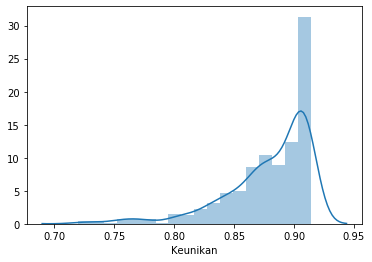

In [84]:
sns.distplot(dataset["Keunikan"])

In [27]:
title = "**Keunikan"
stat, p = normaltest(dataset["Keunikan"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 158.617, $p$ = 0.000

**Keunikan Tidak Berdistribusi Normal**

***
```

```

#### AreaBulatan

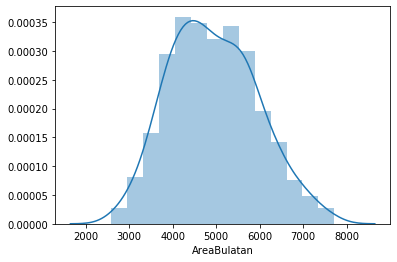

In [86]:
sns.distplot(dataset["AreaBulatan"])

In [28]:
title = "**AreaBulatan"
stat, p = normaltest(dataset["AreaBulatan"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 10.739, $p$ = 0.005

**AreaBulatan Tidak Berdistribusi Normal**

***
```

```

#### Diameter

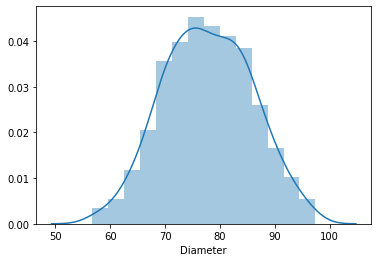

In [88]:
sns.distplot(dataset["Diameter"])

In [29]:
title = "**Diameter"
stat, p = normaltest(dataset["Diameter"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 7.446, $p$ = 0.024

**Diameter Tidak Berdistribusi Normal**

***
```

```

#### KadarAir

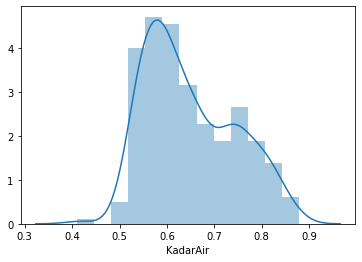

In [90]:
sns.distplot(dataset["KadarAir"])

In [30]:
title = "**KadarAir"
stat, p = normaltest(dataset["KadarAir"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 48.756, $p$ = 0.000

**KadarAir Tidak Berdistribusi Normal**

***
```

```

####  Keliling

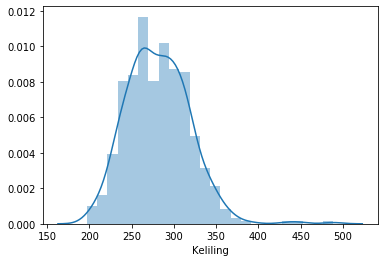

In [92]:
sns.distplot(dataset["Keliling"])

In [23]:
title = "**Keliling"
stat, p = normaltest(dataset["Keliling"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 67.465, $p$ = 0.000

**Keliling Tidak Berdistribusi Normal**

***
```

```

#### Bulatan

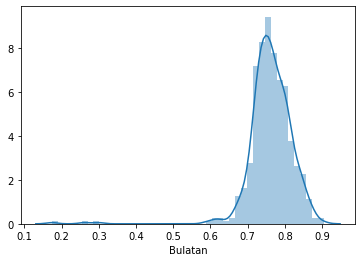

In [94]:
sns.distplot(dataset["Bulatan"])

In [22]:
title = "**Bulatan"
stat, p = normaltest(dataset["Bulatan"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 442.119, $p$ = 0.000

**Bulatan Tidak Berdistribusi Normal**

***
```

```

#### Ransum

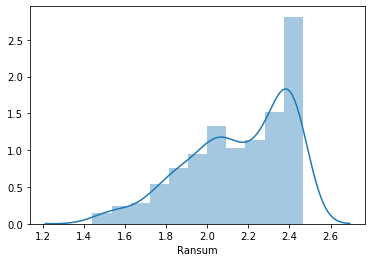

In [97]:
sns.distplot(dataset["Ransum"])

In [18]:
title = "**Ransum"
stat, p = normaltest(dataset["Ransum"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 37.060, $p$ = 0.000

**Ransum Tidak Berdistribusi Normal**

***
```

```

#### Target

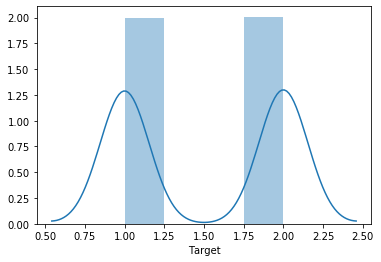

In [98]:
sns.distplot(dataset["Target"])

In [19]:
title = "**Target"
stat, p = normaltest(dataset["Target"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %.3f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 2069.995, $p$ = 0.000

**Target Tidak Berdistribusi Normal**

***
```






```

### 4. Melakukan test hipotesis 1 sampel dan menuliskan 6 langkah testing 
Menampilkan juga boxplotnya untuk kolom / bagian yang bersesuaian.
- Nilai rata-rata Daerah di atas 4700?
- Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
- Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
- Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
- Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

### 5. Melakukan test hipotesis 2 sampel dan menuliskan 6 langkah testing
Menampilkan juga boxplotnya untuk kolom / bagian yang bersesuaian.
- Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
- Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
- Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
- Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
- Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

### 6. Test korelasi
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

In [71]:
# Pengimportan library yang digunakan untuk tes korelasi
import numpy as np
import matplotlib.pyplot as plt

# Penambahan warning suppresion pada seaborn FutureWarning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Test korelasi akan menghasilkan Pearson Correlation Coefficient $\rho_{X,Y}$ untuk suatu random variable $X$ dan $Y$ yang memiliki rentang nilai $-1 \geq \rho_{X,Y}\geq 1$.
- Bila mendekati $1$, maka variabel $X$ dan $Y$ berkolerasi berbanding lurus.
- Bila mendekati $0$, maka variabel $X$ dan $Y$  tidak berkolerasi.
- Bila mendekati $-1$, maka variabel $X$ dan $Y$  berkolerasi berbanding terbalik.

#### Klasifikasi
- **Perfect**
  - Koefisien bernilai tepat $\pm 1$, dapat dikatakan sebagai perfect correlation
- **High degree**
  - Koefisien bernilai $0.5 \leq | \rho_{X,Y} | < 1$, dapat dikatakan sebagai strong correlation.
- **Moderate degree**
  - Koefisien bernilai $0.3 \leq | \rho_{X,Y} | < 0.5$, dapat dikatakan sebagai medium correlation.
- **Low degree**
  - Koefisien bernilai  $0 < | \rho_{X,Y} | < 0.3$, dapat dikatakan sebagai small correlation.
- **No correlation**
  - Koefisien bernilai tepat $0$, dapat dikatakan sebagai no correlation.

***
#### Daerah

Kolom Daerah dengan kolom target

$\rho_{X,Y} = -0.6027466517416661$

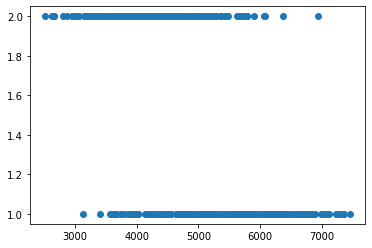

In [50]:
printMarkdown("Kolom Daerah dengan kolom target")
rho = np.corrcoef(dataset["Daerah"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Daerah"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Daerah dan Target
berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='Daerah', ylabel='Target'>

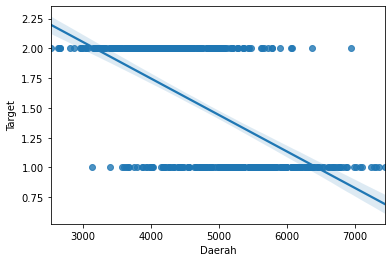

In [72]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Daerah"], dataset["Target"])

***
```

```

#### SumbuUtama

Kolom SumbuUtama dengan kolom target


$\rho_{X,Y} = -0.7130906104204593$

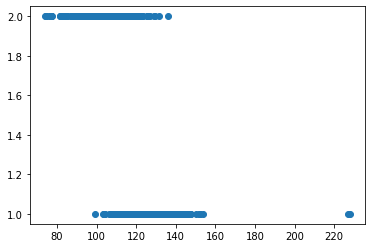

In [52]:
printMarkdown("Kolom SumbuUtama dengan kolom target")
rho = np.corrcoef(dataset["SumbuUtama"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["SumbuUtama"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom SumbuUtama dan Target 
berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='SumbuUtama', ylabel='Target'>

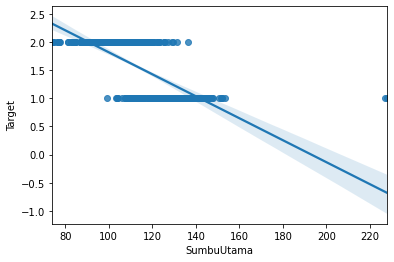

In [74]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["SumbuUtama"], dataset["Target"])

***
```

```

#### SumbuKecil

Kolom SumbuKecil dengan kolom target


$\rho_{X,Y} = -0.15297517335535027$

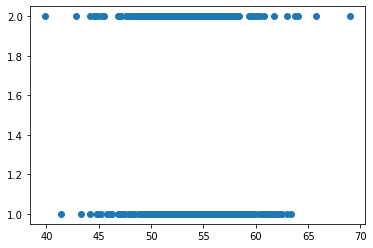

In [54]:
printMarkdown("Kolom SumbuKecil dengan kolom target")
rho = np.corrcoef(dataset["SumbuKecil"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["SumbuKecil"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom SumbuKecil dan Target 
berkorelasi **berbanding terbalik** secara **small correlation**.

<AxesSubplot:xlabel='SumbuKecil', ylabel='Target'>

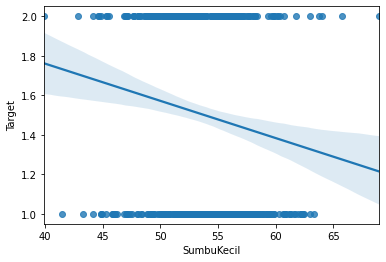

In [75]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["SumbuKecil"], dataset["Target"])

***
```

```

#### Keunikan

Kolom Keunikan dengan kolom target


$\rho_{X,Y} = -0.7304563686511923$

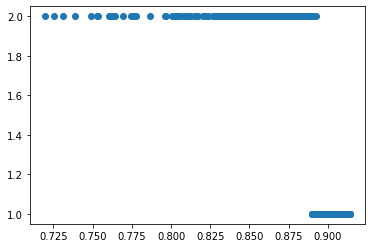

In [56]:
printMarkdown("Kolom Keunikan dengan kolom target")
rho = np.corrcoef(dataset["Keunikan"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Keunikan"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Keunikan dan Target berkorelasi **berbanding terbalik** secara **high degree**.

<AxesSubplot:xlabel='Keunikan', ylabel='Target'>

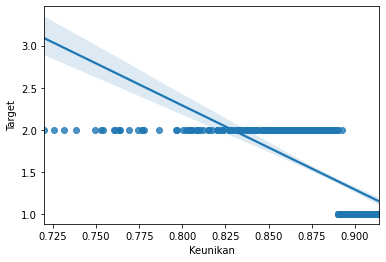

In [76]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Keunikan"], dataset["Target"])

***
```

```

#### AreaBulatan

Kolom AreaBulatan dengan kolom target


$\rho_{X,Y} = -0.6073125434153751$

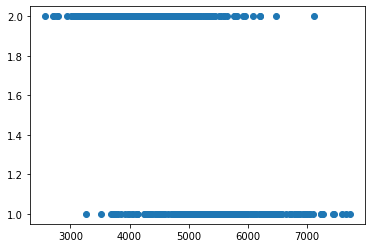

In [58]:
printMarkdown("Kolom AreaBulatan dengan kolom target")
rho = np.corrcoef(dataset["AreaBulatan"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["AreaBulatan"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom AreaBulatan dan Target berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='AreaBulatan', ylabel='Target'>

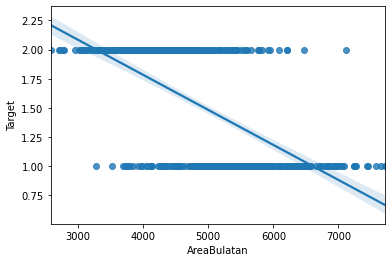

In [77]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["AreaBulatan"], dataset["Target"])

***
```

```

#### Diameter

Kolom Diameter dengan kolom target


$\rho_{X,Y} = -0.6025356896618813$

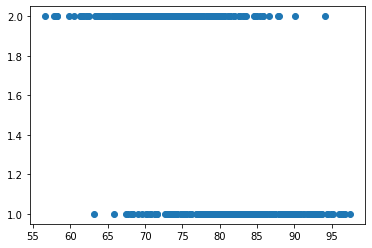

In [60]:
printMarkdown("Kolom Diameter dengan kolom target")
rho = np.corrcoef(dataset["Diameter"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Diameter"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Diameter dan Target berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='Diameter', ylabel='Target'>

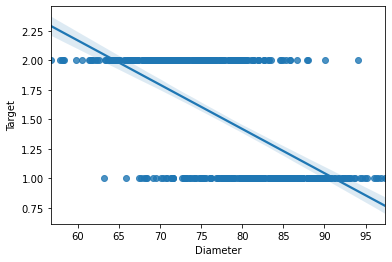

In [79]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Diameter"], dataset["Target"])

***
```

```

#### KadarAir

Kolom KadarAir dengan kolom target


$\rho_{X,Y} = 0.13434422605727642$

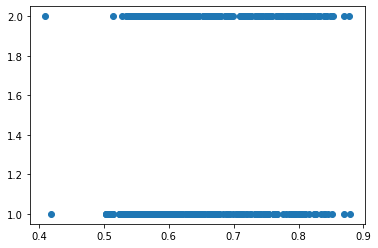

In [62]:
printMarkdown("Kolom KadarAir dengan kolom target")
rho = np.corrcoef(dataset["KadarAir"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["KadarAir"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom KadarAir dan Target berkorelasi **berbanding lurus** secara **small correlation**.

<AxesSubplot:xlabel='KadarAir', ylabel='Target'>

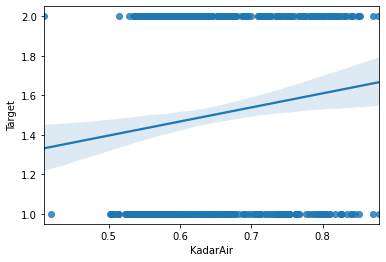

In [80]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["KadarAir"], dataset["Target"])

***
```

```

#### Keliling

Kolom Keliling dengan kolom target


$\rho_{X,Y} = -0.6348607454756855$

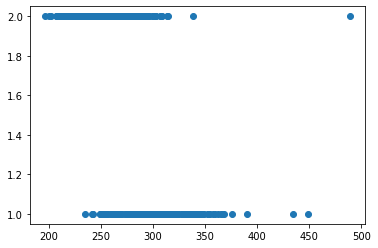

In [64]:
printMarkdown("Kolom Keliling dengan kolom target")
rho = np.corrcoef(dataset["Keliling"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Keliling"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Keliling dan Target berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='Keliling', ylabel='Target'>

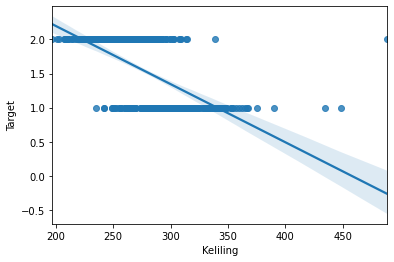

In [81]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Keliling"], dataset["Target"])

***
```

```

#### Bulatan

Kolom Bulatan dengan kolom target


$\rho_{X,Y} = 0.5450045317240078$

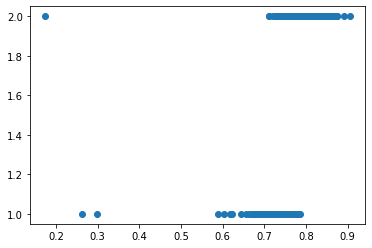

In [66]:
printMarkdown("Kolom Bulatan dengan kolom target")
rho = np.corrcoef(dataset["Bulatan"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Bulatan"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Bulatan dan Target berkorelasi **berbanding lurus** secara **strong correlation**.

<AxesSubplot:xlabel='Bulatan', ylabel='Target'>

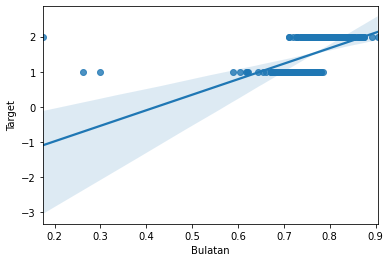

In [82]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Bulatan"], dataset["Target"])

***
```

```

#### Ransum

Kolom Ransum dengan kolom target


$\rho_{X,Y} = -0.8399038681287492$

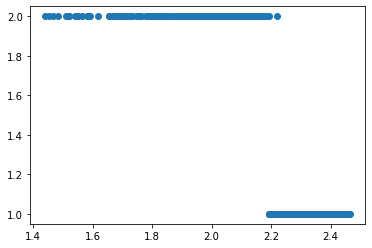

In [68]:
printMarkdown("Kolom Ransum dengan kolom target")
rho = np.corrcoef(dataset["Ransum"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Ransum"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Ransum dan Target berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='Ransum', ylabel='Target'>

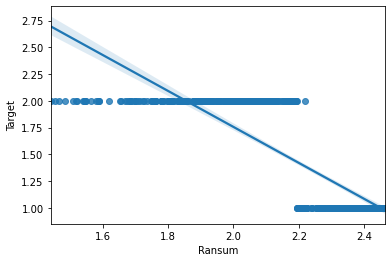

In [83]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Ransum"], dataset["Target"])